# Forest Fires in Portugal Analysis

This notebook explores the Forest Fires dataset from UCI (https://archive.ics.uci.edu/ml/datasets/forest+fires).

For now it only contains an unfinished exploratory data analysis of the dataset.

**This is a work in progress.**

In [2]:
%load_ext autoreload
%autoreload 2

# Avaliation of Forest Fires in Portugal

A brief analysis of Forest Fires data in Portugal.

In [3]:
import sys
import pandas as pd
import altair as alt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from dslib.analysis import Analysis
lab, raw = Analysis.from_csv("data/forestfires.csv")

## Data Description

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int32  
 1   Y       517 non-null    int32  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int32  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int32(3), object(2)
memory usage: 46.6+ KB


In [5]:
raw.columns = raw.columns.str.lower()
lab.eda.describe_numerical(raw)

,x,y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
lab.eda.describe_category(raw)

In [8]:
raw.drop(columns=['x', 'y', 'month', 'day'], inplace=True)

In [9]:
lab.eda.boxplot_all(raw)

In [10]:
lab.scaler_fit(raw)
rawScaled = lab.scale(raw)
lab.eda.boxplot_all(rawScaled)

In [11]:
lab.eda.histogram_all(rawScaled)

In [12]:
chart_1 = lab.eda.histogram(rawScaled, 'area', {
  'x': {'bin': alt.BinParams(step=0.025, extent=[-.3, 0]) },
  'properties': {'title': 'Area Distribution [-0.3, 0]'}
})

chart_2 = lab.eda.histogram(rawScaled, 'area', {
    'x': {'bin': alt.BinParams(step=1, extent=[0, 18])},
    'properties': { 'title': 'Area Distribution [0, 18]'}
})

# lab.eda.histogram(rawScaled, 'area', { 'x': { 'bin': True}})

chart_1 | chart_2

alt.HConcatChart(...)

In [26]:
pd.DataFrame(rawScaled.area.describe()).style.applymap(
  lambda x: 'color: yellow',  
  subset=pd.IndexSlice['50%', ['area']]
)

# lab.eda.histogramlab.eda.histogram(rawScaled, 'DMC', {'x': {'bin': True}})


,area
count,517.000000
mean,0.000000
std,1.000969
min,-0.202020
25%,-0.202020
50%,-0.193843
75%,-0.098709
max,16.951110


In [28]:
areaT = rawScaled.area.transform(lambda x: x < -0.2)
areaT.value_counts()

False    269
True     248
Name: area, dtype: int64

In [29]:
# rawScaled.area = areaT.factorize()
hasFire, _ = areaT.factorize()
X = raw.join(
  pd.DataFrame(hasFire, columns=['hasFire'], dtype='category')
).drop(['area'], axis='columns')
# rawScaled.index

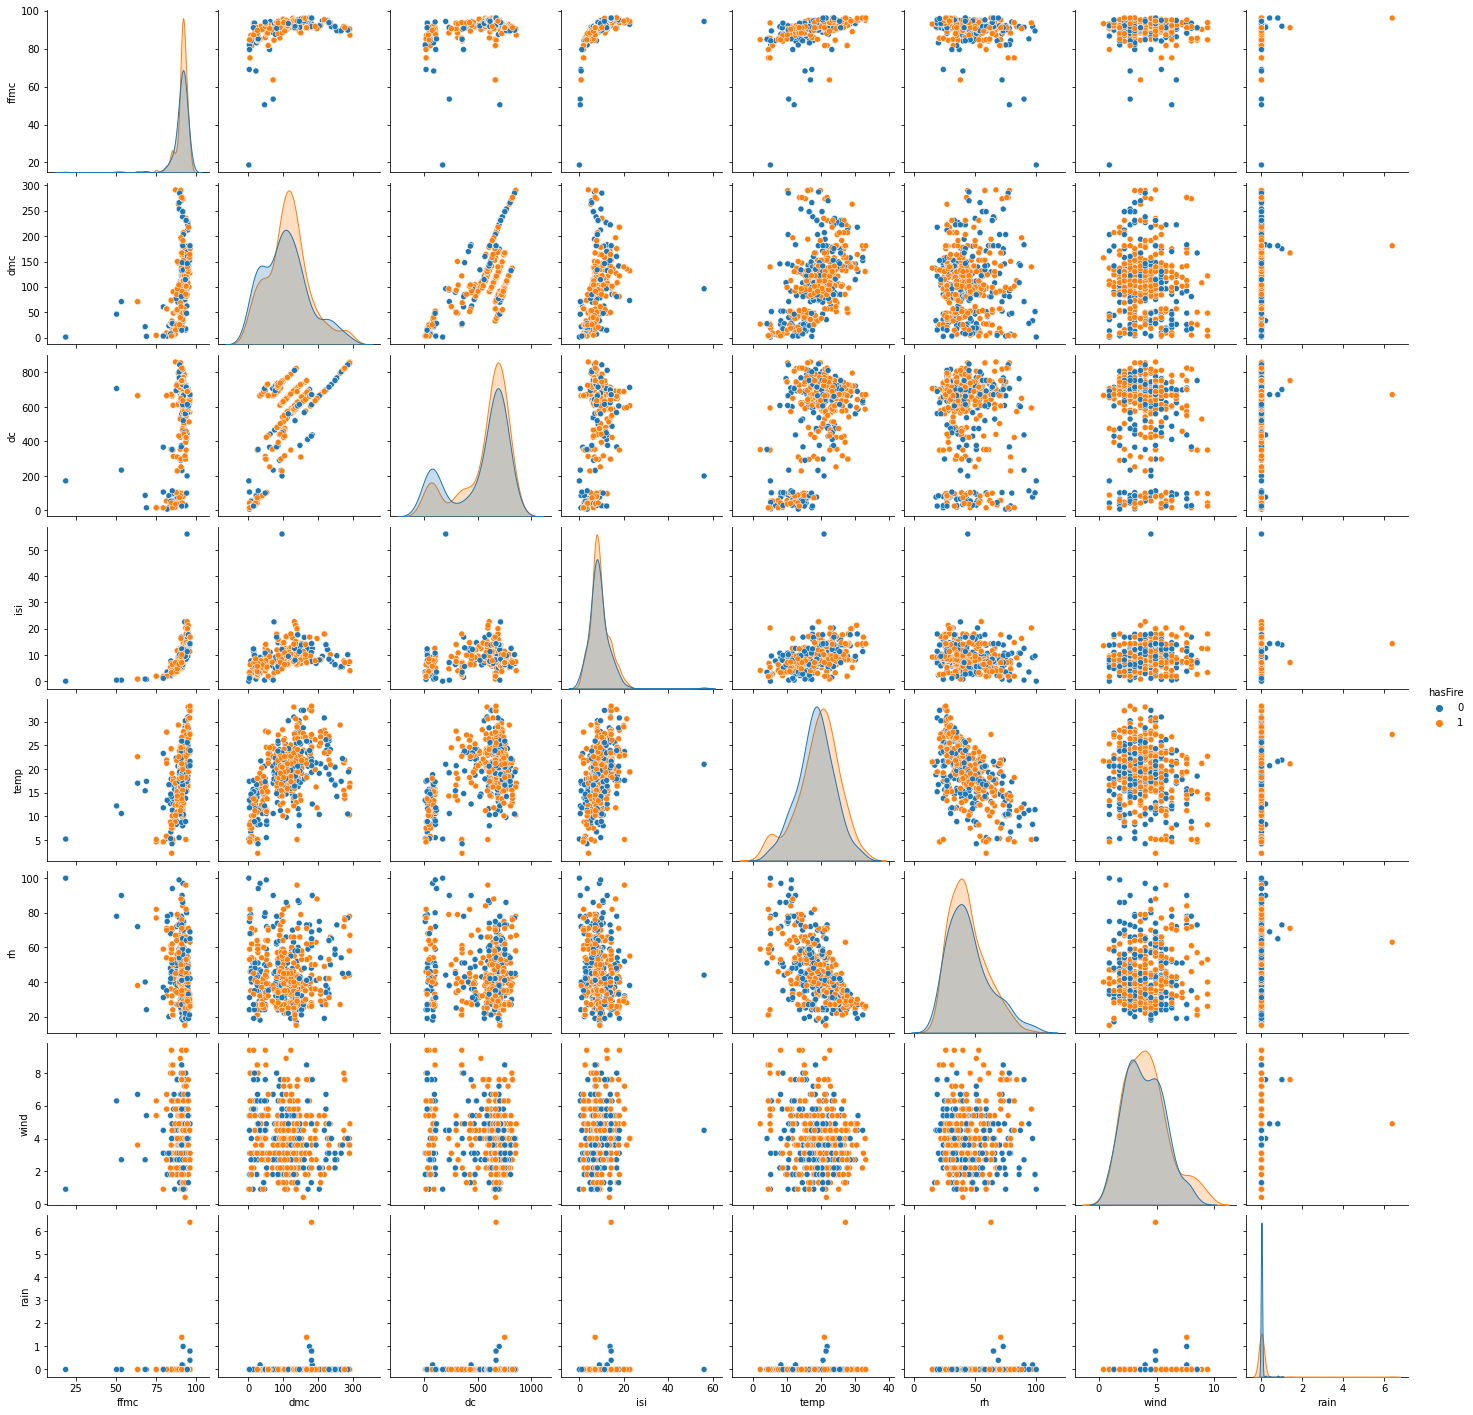

In [30]:
# X.hasFire.value_counts()
# lab.eda.boxplot(X, 'hasFire', 'rain')
# rawScaled.info()
# X[['rain', 'hasFire']].groupby('hasFire').plot()

sns.pairplot(X, hue="hasFire")


In [32]:
lab.eda.histogram(rawScaled,'dmc', {'x': { 'bin': True }})

alt.Chart(...)

In [33]:
lab.eda.histogram(rawScaled, 'dmc', {'encode': {'color': 'area'}})

alt.Chart(...)

In [ ]:
# chart_2 = alt.Chart(z).mark_bar().encode(
#     alt.X('Score', bin=alt.BinParams(step=0.05, extent=[-0.5, 2.0])),
#     alt.Y('count()', stack='normalize'),
#     color='Liked:N',
#     tooltip='count()'
# ).interactive()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


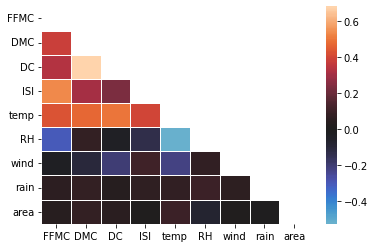

In [ ]:
lab.eda.corr(rawScaled)

In [34]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)


In [38]:
from scipy.cluster.hierarchy import dendrogram
clustering

AgglomerativeClustering()

In [42]:
X.hasFire = clustering.labels_

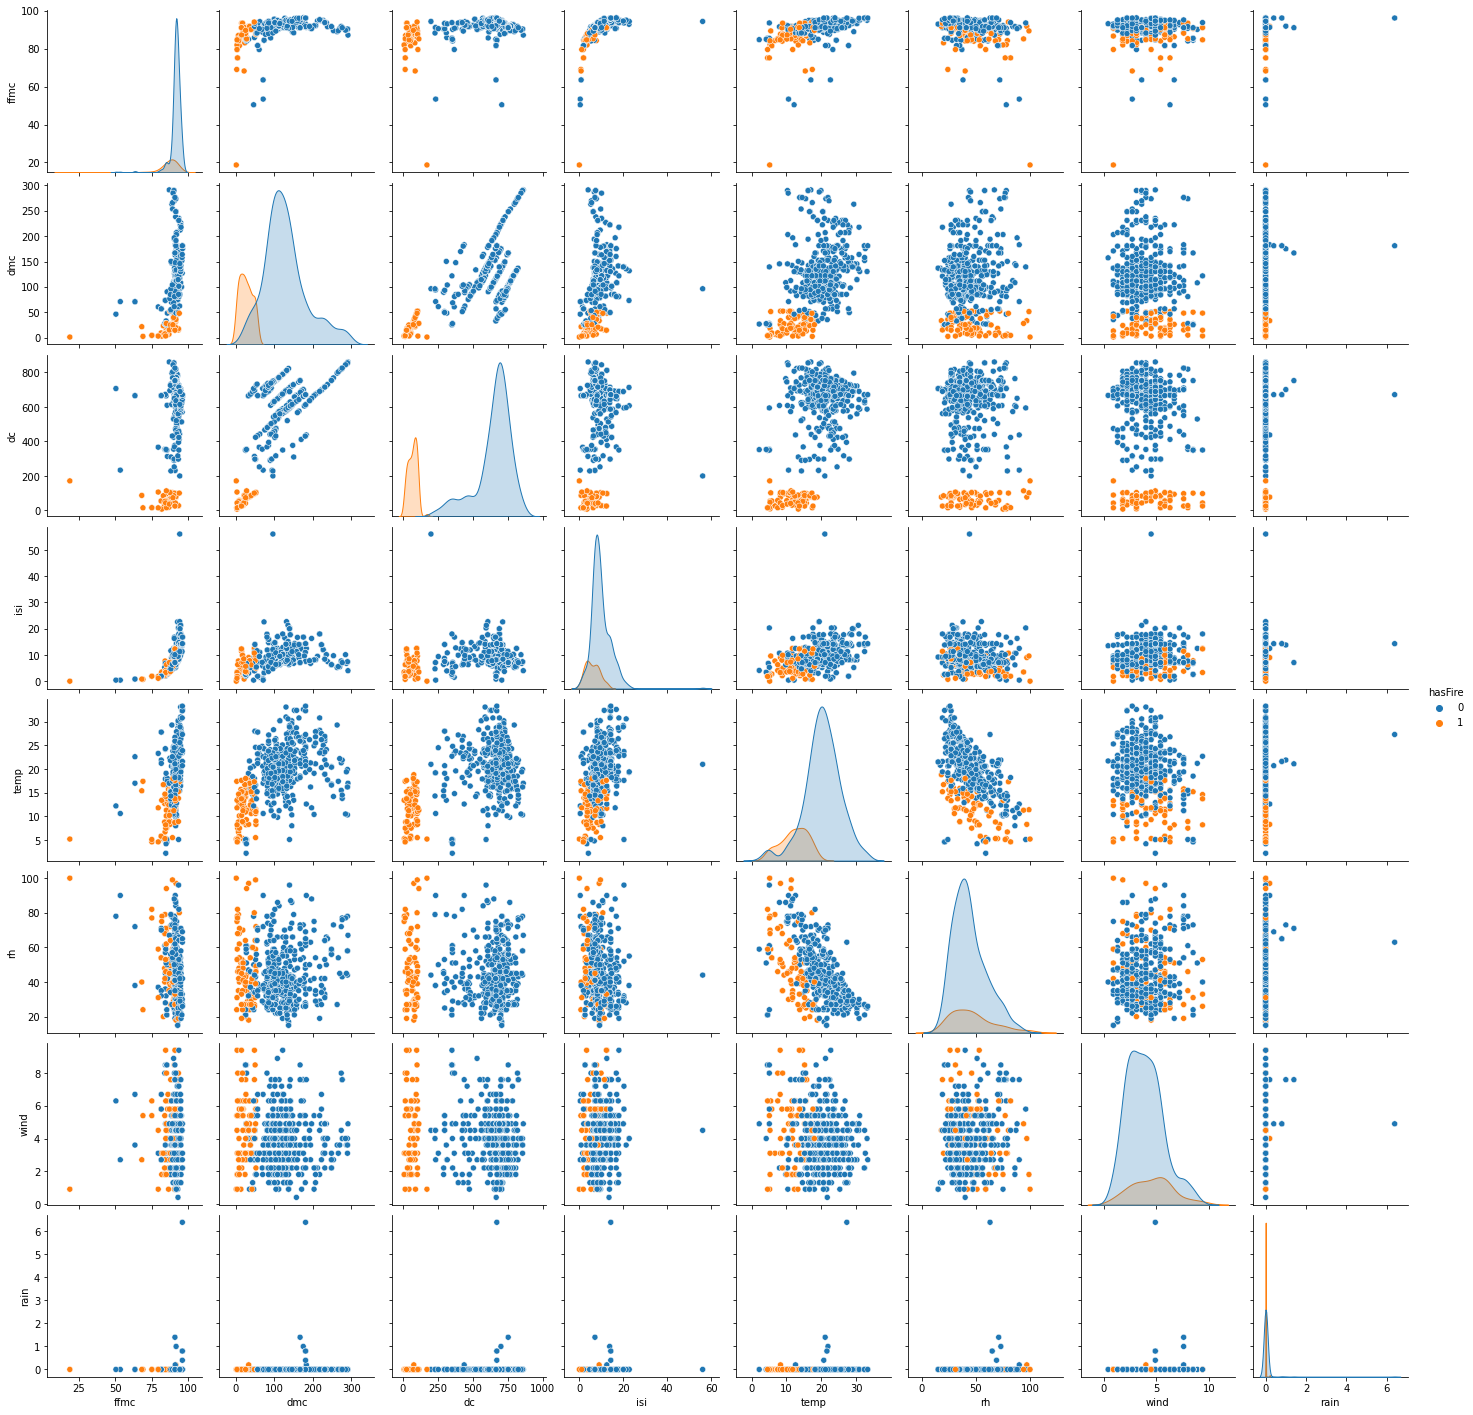

In [43]:
sns.pairplot(X, hue="hasFire")